In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

In [2]:
all_files = '../confusion_processed/*'

In [3]:
confused_files = []

for file in glob.glob(all_files):
    print(file)
    students_confused_df = pd.read_csv(file)
    students_confused_df.fillna(value='none', inplace=True)
    emotions_list = ['Not Confused', 'Confused']
    
    all_emotion_ratios = []
    for row in range(students_confused_df.shape[0]):
        # emotion_ratios = {key:0 for key in emotions_list}
        # confusion_vals = []
        emotion, counts = np.unique(students_confused_df.iloc[row, 1:].values, return_counts=True)
        idx_none = emotion == 'none'
        emotion_not_none = emotion[~idx_none]
        ratio = counts[~idx_none]/np.sum(counts[~idx_none])
        # for emo, rats in zip(emotion_not_none, ratio):
        #     emotion_ratios[emo] = rats
        for emo, rats in zip(emotion_not_none, ratio):
            if emo == 'Confused':
                confusion_vals = rats
        # all_emotion_ratios.append(emotion_ratios)
        all_emotion_ratios.append(confusion_vals)
    if len(all_emotion_ratios) > 2401:
        confused_files.append(all_emotion_ratios[:-1])
    else:
        confused_files.append(all_emotion_ratios)
    # confused_files.append(all_emotion_ratios)

../confusion_processed/20190430_confusion.csv
../confusion_processed/20190409_confusion.csv
../confusion_processed/20190423_confusion.csv
../confusion_processed/20190207_confusion.csv
../confusion_processed/20190404_confusion.csv
../confusion_processed/20190307_confusion.csv
../confusion_processed/20190221_confusion.csv
../confusion_processed/20190226_confusion.csv
../confusion_processed/20190328_confusion.csv
../confusion_processed/20190416_confusion.csv
../confusion_processed/20190326_confusion.csv
../confusion_processed/20190418_confusion.csv
../confusion_processed/20190425_confusion.csv
../confusion_processed/20190502_confusion.csv
../confusion_processed/20190321_confusion.csv


In [5]:
confused_files[0]

[0.6666666666666666,
 0.5,
 0.4,
 0.18181818181818182,
 0.42857142857142855,
 0.5,
 0.3333333333333333,
 0.2857142857142857,
 0.5,
 0.25,
 0.5,
 0.4,
 0.5555555555555556,
 0.14285714285714285,
 0.2857142857142857,
 0.4,
 0.125,
 0.125,
 0.2,
 0.1111111111111111,
 0.14285714285714285,
 0.2,
 0.1111111111111111,
 0.4,
 0.4666666666666667,
 0.4,
 0.35294117647058826,
 0.29411764705882354,
 0.125,
 0.3125,
 0.125,
 0.25,
 0.3333333333333333,
 0.1875,
 0.1875,
 0.13333333333333333,
 0.375,
 0.1875,
 0.23529411764705882,
 0.2,
 0.42857142857142855,
 0.25,
 0.2222222222222222,
 0.26666666666666666,
 0.4,
 0.2,
 0.375,
 0.4375,
 0.29411764705882354,
 0.4117647058823529,
 0.25,
 0.47058823529411764,
 0.26666666666666666,
 0.47058823529411764,
 0.2631578947368421,
 0.5,
 0.4,
 0.4444444444444444,
 0.47368421052631576,
 0.2631578947368421,
 0.3888888888888889,
 0.23529411764705882,
 0.3888888888888889,
 0.42105263157894735,
 0.2631578947368421,
 0.2631578947368421,
 0.2777777777777778,
 0.2222222

In [6]:
import scipy.stats 
def mean_confidence_interval(data, confidence=0.90):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return h

In [7]:
y = np.mean(confused_files, axis=0)
yci = mean_confidence_interval(confused_files, confidence=0.95)
x = np.arange(len(confused_files[0]))

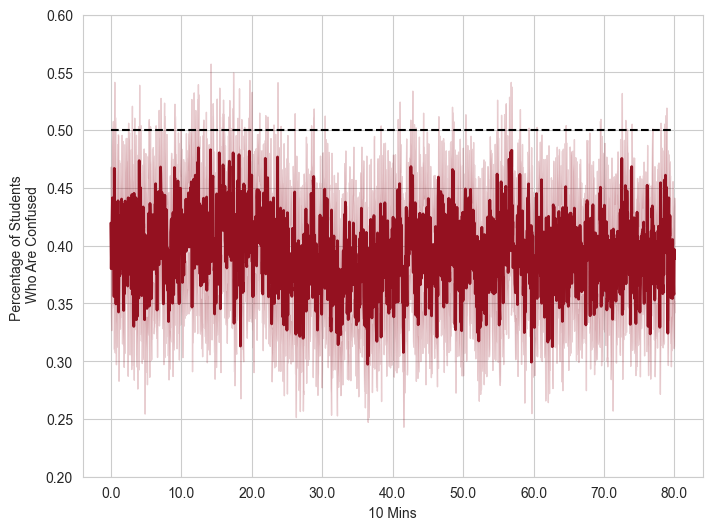

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, 
        y, 
        color = '#941120', 
        linewidth = 2, 
        label='mean')
ax.set_xticks(np.arange(0, len(x), 300))
ax.set_xticklabels(np.arange(0, len(x)/30, 10))
ax.set_xlabel('10 Mins')
ax.set_ylabel('Percentage of Students \n Who Are Confused')
ax.fill_between(x, y - yci, y + yci, color='#941120', alpha=0.2)
ax.set_ylim([0.2, 0.6])
ax.hlines(0.5, 0, 2400, color = 'k', linestyles='dashed')
# ax.legend(title='Student Attention Progrssion in 05391A')
plt.show()
fig.savefig('../figure_panels/fig3a.svg', bbox_inches='tight', dpi=300)

Above, students confusion are independent of the time

In [16]:
np.arange(0, len(x)/30, 10)

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.])

In [14]:
np.arange(0, len(x), 300)

array([   0,  300,  600,  900, 1200, 1500, 1800, 2100, 2400])

In [15]:
len(y)

2401

In [12]:
sample = '../confusion_processed/20190207_confusion.csv'

In [14]:
students_confused_df = pd.read_csv(sample)

In [16]:
students_confused_df.fillna(value='none', inplace=True)

In [17]:
students_confused_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,24,25,26,27
0,0,Confused,Not Confused,Not Confused,Not Confused,Confused,Not Confused,Not Confused,Confused,Confused,...,Confused,Confused,none,none,none,none,none,none,none,none
1,1,Confused,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,Not Confused,Confused,...,none,none,none,none,none,none,none,none,none,none
2,2,Confused,Not Confused,Not Confused,Not Confused,Confused,Not Confused,Not Confused,Not Confused,Not Confused,...,none,none,none,none,none,none,none,none,none,none
3,3,Confused,Not Confused,Not Confused,Not Confused,Confused,Not Confused,Not Confused,Not Confused,Not Confused,...,none,none,none,none,none,none,none,none,none,none
4,4,Confused,Not Confused,Not Confused,Not Confused,Confused,Not Confused,Not Confused,Not Confused,Not Confused,...,Confused,none,none,none,none,none,none,none,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362,2362,Not Confused,Confused,Not Confused,Confused,Confused,Not Confused,Confused,Confused,Not Confused,...,Not Confused,Not Confused,Not Confused,Confused,none,none,none,none,none,none
2363,2363,Not Confused,Not Confused,Not Confused,Not Confused,Confused,Confused,Confused,Confused,Confused,...,Not Confused,Not Confused,Not Confused,none,none,none,none,none,none,none
2364,2364,Not Confused,Confused,Confused,Not Confused,Not Confused,Confused,Not Confused,Confused,Not Confused,...,Not Confused,Not Confused,Not Confused,Confused,Not Confused,none,none,none,none,none
2365,2365,Not Confused,Not Confused,Not Confused,Confused,Not Confused,Confused,Not Confused,Confused,Confused,...,Not Confused,Not Confused,Not Confused,Confused,Not Confused,none,none,none,none,none


In [18]:
emotions_list = ['Not Confused', 'Confused']

all_emotion_ratios = []
for row in range(students_confused_df.shape[0]):
    emotion_ratios = {key:0 for key in emotions_list}
    emotion, counts = np.unique(students_confused_df.iloc[row, 1:].values, return_counts=True)
    idx_none = emotion == 'none'
    emotion_not_none = emotion[~idx_none]
    ratio = counts[~idx_none]/np.sum(counts[~idx_none])
    for emo, rats in zip(emotion_not_none, ratio):
        emotion_ratios[emo] = rats
    all_emotion_ratios.append(emotion_ratios)


In [22]:
all_emotion_ratios_df = pd.DataFrame(all_emotion_ratios)

In [23]:
all_emotion_ratios_df.head()

,Not Confused,Confused
0,0.500000,0.500000
1,0.823529,0.176471
2,0.666667,0.333333
3,0.764706,0.235294
4,0.684211,0.315789


In [24]:
all_emotion_ratios_df.sort_values(by='Confused', ascending=False, inplace=True)

In [28]:
all_emotion_ratios_df.reset_index(drop=True, inplace=True)

In [30]:
all_emotion_ratios_df

,Not Confused,Confused
0,0.333333,0.666667
1,0.333333,0.666667
2,0.352941,0.647059
3,0.352941,0.647059
4,0.357143,0.642857
...,...,...
2362,0.944444,0.055556
2363,0.950000,0.050000
2364,0.950000,0.050000
2365,1.000000,0.000000


Text(0, 0.5, 'Student Confused Probability')

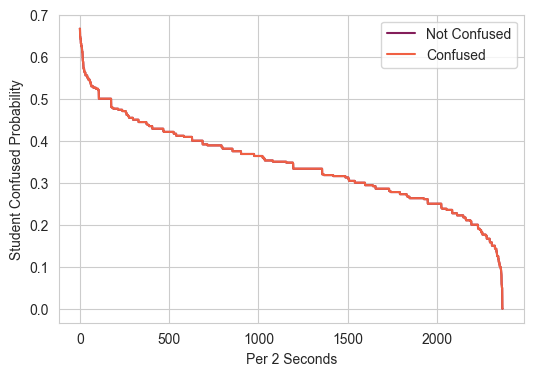

In [32]:
fig, ax = plt.subplots(figsize=(6, 4))
cmaps = sns.color_palette('rocket', n_colors=len(emotions_list))
for cmap, selected_emotions in zip(cmaps, emotions_list):
    sns.lineplot(data=all_emotion_ratios_df, 
                 x = all_emotion_ratios_df.index, y = 'Confused',
                 color=cmap, ax=ax, label=selected_emotions)
ax.set_xlabel('Per 2 Seconds')
ax.set_ylabel('Student Confused Probability')
# fig.savefig('confused_sample.png', bbox_inches='tight', dpi=300)